In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('train_motion_data.csv')

In [3]:
data.Class.unique()

array(['NORMAL', 'AGGRESSIVE', 'SLOW'], dtype=object)

In [4]:
data.Class=data.Class.replace(['AGGRESSIVE', 'NORMAL', 'SLOW'],[1,2,3])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


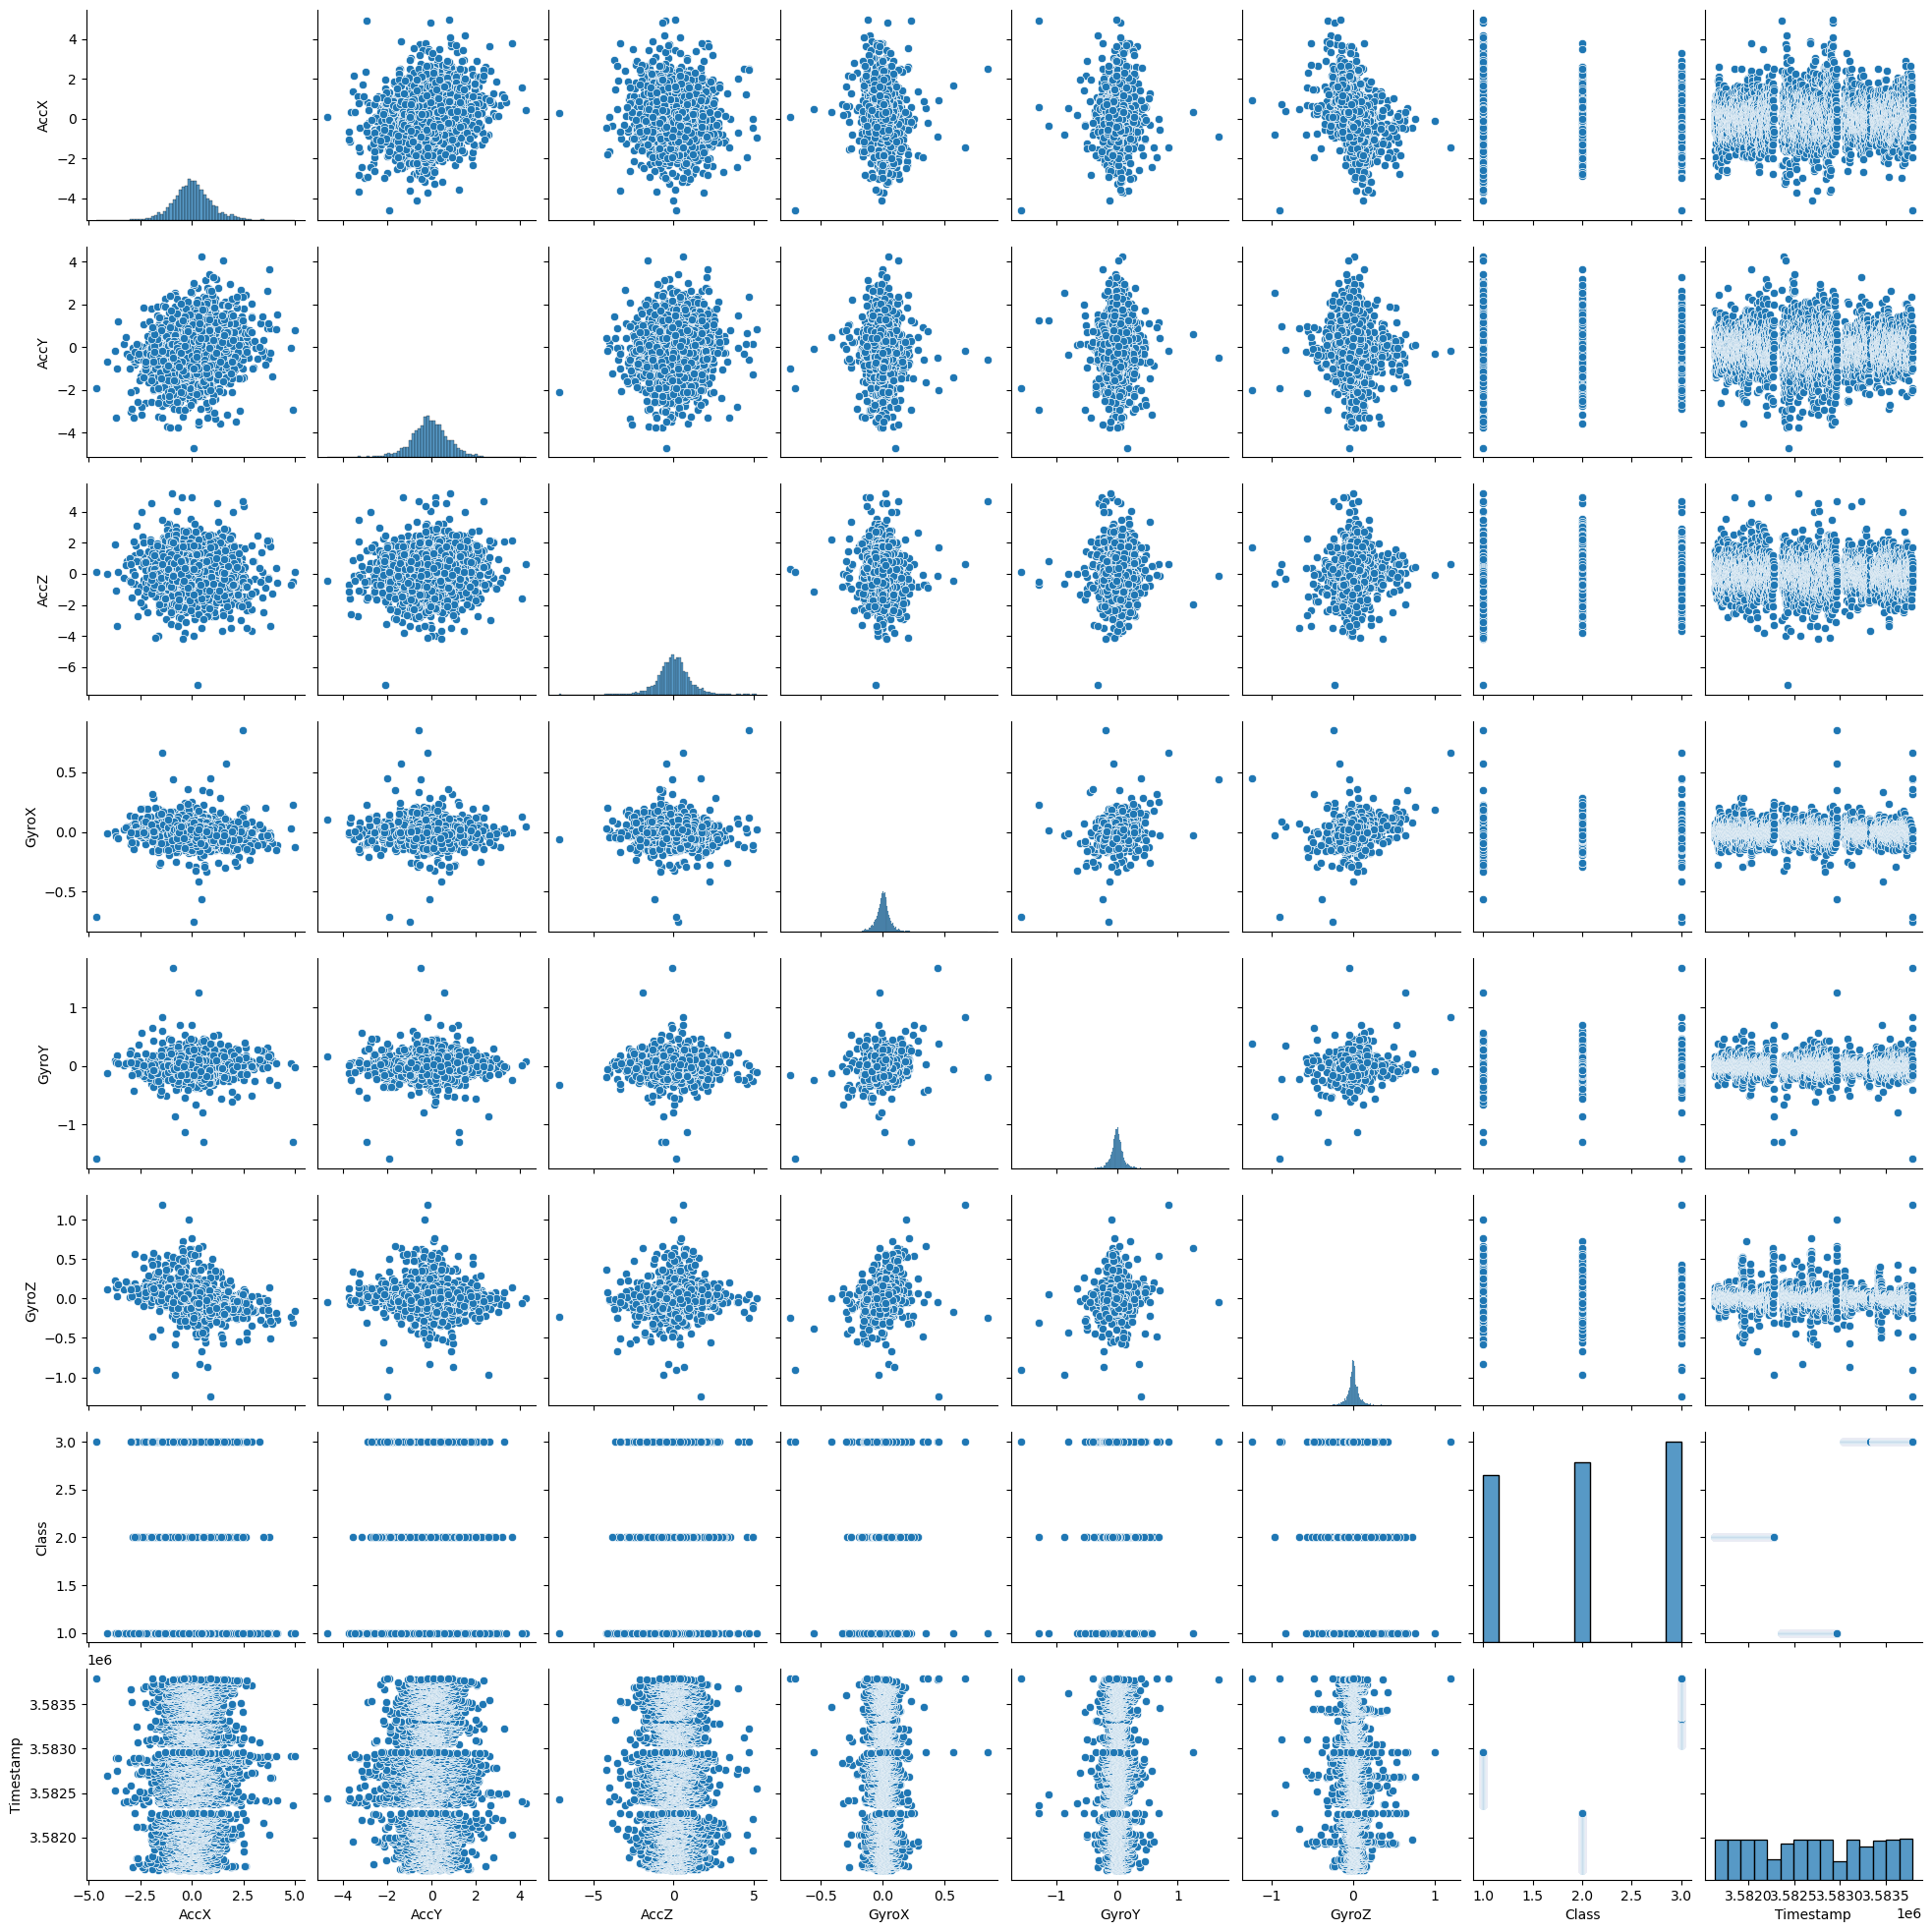

In [5]:
sns.pairplot(data)

In [6]:
x=data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y=data.Class

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [8]:
ModelD=DecisionTreeClassifier()

In [9]:
ModelD.fit(x_train,y_train)
y_predict=ModelD.predict(x_test)

In [10]:
ModelD.score(x_test,y_test)

0.355281207133059

In [11]:
confusion_matrix(y_test,y_predict)

array([[78, 70, 63],
       [90, 88, 91],
       [80, 76, 93]], dtype=int64)

In [12]:
k=0
M=-1
for i in range (1,101):
    ModelK=KNeighborsClassifier(n_neighbors=i)
    ModelK.fit(x_train,y_train)
    S=ModelK.score(x_test,y_test)
    if S>M:
        M=S
        k=i
print(k)

7


In [13]:
ModelK=KNeighborsClassifier(n_neighbors=k)

In [14]:
ModelK.fit(x_train,y_train)
y_predict=ModelK.predict(x_test)

In [15]:
ModelK.score(x_test,y_test) 

0.4170096021947874

In [16]:
confusion_matrix(y_test,y_predict)

array([[ 91,  57,  63],
       [ 74,  94, 101],
       [ 61,  69, 119]], dtype=int64)

In [17]:
ModelR=RandomForestClassifier()
ModelR.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
ModelR.score(x_test,y_test)

0.38271604938271603

In [19]:
test=pd.read_csv('test_motion_data.csv')

In [20]:
xtest=data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
ytest=data.Class

In [21]:
ModelR.predict(xtest)

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [22]:
ytest

0       2
1       2
2       2
3       2
4       2
       ..
3639    3
3640    3
3641    3
3642    3
3643    3
Name: Class, Length: 3644, dtype: int64

In [23]:
ModelR.score(xtest,ytest)

0.8765093304061471

In [24]:
ModelK.score(xtest,ytest)

0.5301866081229418

In [25]:
ModelD.score(xtest,ytest)

0.8710208562019759